In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=r",")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
df.shape

(5110, 12)

In [29]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [30]:
df.dtypes
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['bmi'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[36.6  nan 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9
 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5
 33.7 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5
 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.9 28.1 31.1 21.7 27.  24.1
 45.9 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8
 34.6 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31.  31.7 35.8 28.4 20.1 26.7
 38.7 34.9 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 36.9 37.3 45.7
 34.2 23.6 22.3 37.1 45.  25.5 30.8 37.4 34.5 27.9 29.5 46.  42.5 35.5
 26.9 45.5 31.5 33.  23.4 30.7 20.5 21.5 40.  28.6 42.2 29.6 35.4 16.9
 26.8 39.3 32.6 35.9 21.2 42.4 40.5 36.7 29.3 19.6 18.  17.6 19.1 50.1
 17.7 54.6 35.  22.  39.4 19.7 22.5 25.2 41.8 60.9 23.7 24.5 31.2 16.
 31.6 25.1 24.8 18.3 20.  19.5 36.  35.3 40.

In [31]:
pd.set_option('future.no_silent_downcasting', True)
df['gender'] = df['gender'].replace({'Female':0, 'Male':1, 'Other': 0}).astype('int64')
df['ever_married'] = df['ever_married'].replace({'Yes':1, 'No':0}).astype('int64')
df['work_type'] = df['work_type'].replace({'Private':1, 'Self-employed':2, 'Govt_job':3, 'children':4, 'Never_worked':5}).astype('int64')
df['Residence_type'] = df['Residence_type'].replace({'Urban':0, 'Rural':1}).astype('int64')
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked':1, 'never smoked':2, 'smokes':3, 'Unknown':4}).astype('int64')
df['bmi'] = df['bmi'].fillna(0)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,0,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,2,1,202.21,0.0,2,1
2,31112,1,80.0,0,1,1,1,1,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,1,0,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,2,1,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,0,83.75,0.0,2,0
5106,44873,0,81.0,0,0,1,2,0,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,2,1,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,1,1,166.29,25.6,1,0


In [32]:
print(np.any(np.isnan(df)))
print(np.all(np.isfinite(df)))

False
True


<Axes: >

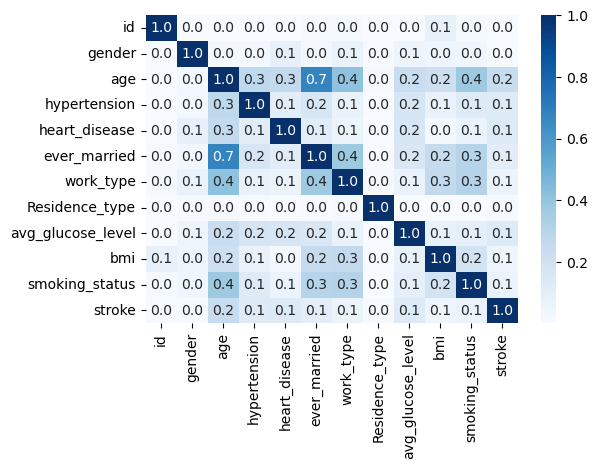

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(abs(df.corr()), annot=True, fmt='.1f', cmap='Blues')

In [34]:
stroke_counts = df.groupby(['stroke'])['stroke'].count()

plt.figure(figsize=(6, 4))
stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Stroke Count')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**The count of patients that have stroke to patients that don't have a stroke is very high, one can say they are highly unbalanced**

- **Categorical Features:** gender, ever_married, work_type, Residence_type, smoking_status
- **Binary Numerical Features:** hypertension,heart_disease, stroke
- **Continous Numerical Features:** age, avg_glucose_level, bmi

We can move gender, ever_married and Residence_type to Binary Numerical like this  
- **Categorical Features:** work_type, smoking_status  
- **Binary Numerical Features:** hypertension,heart_disease, stroke, gender, ever_married, Residence_type
- **Continous Numerical Features:** age, avg_glucose_level, bmi

In [35]:
df[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,27.756732
std,22.612647,45.283560,9.529497
min,0.080000,55.120000,0.000000
25%,25.000000,77.245000,22.900000
50%,45.000000,91.885000,27.700000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


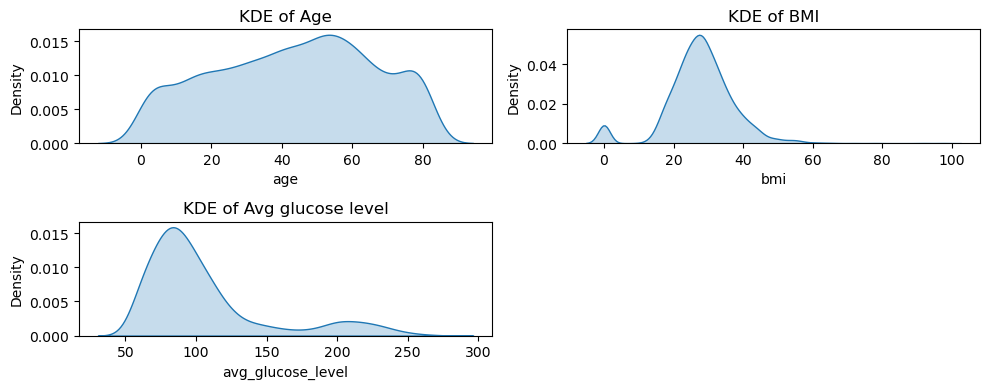

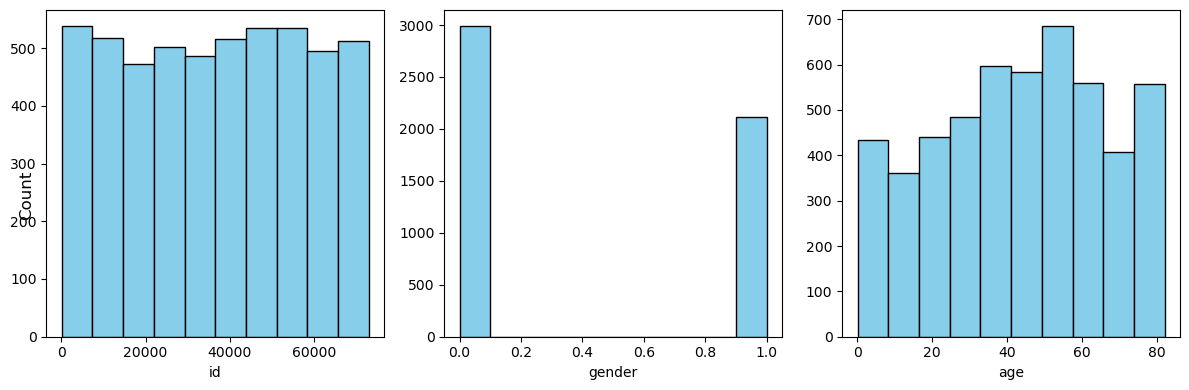

In [54]:
plt.figure(figsize=(10, 4))

# KDE for age
plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='age', fill=True)
plt.title('KDE of Age')

# KDE for bmi
plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='bmi', fill=True)
plt.title('KDE of BMI')

plt.subplot(2,2,3)
sns.kdeplot(data=df, x='avg_glucose_level', fill=True)
plt.title("KDE of Avg glucose level")

plt.tight_layout()
plt.show()

import math
continuous = df[['age','bmi','avg_glucose_level']]
n_plots = len(continuous.columns)
n_cols = 3
n_rows = int(math.ceil(n_plots/n_cols))
gs = gridspec.GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(12,4))
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    ax.hist(df[df.columns[i]], bins=10, color='skyblue', edgecolor='black')
    ax.set_xlabel(df.columns[i])
fig.tight_layout()
fig.supylabel('Count')
plt.show()

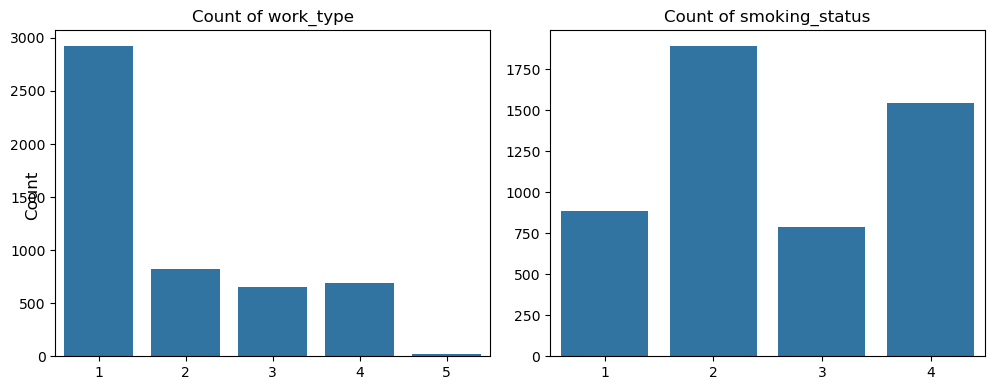

In [65]:
# Select categorical columns
category = df[['work_type', 'smoking_status']]
n_plots = len(category.columns)
n_cols = 3
n_rows = int(math.ceil(n_plots / n_cols))

# Set up grid layout
gs = gridspec.GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(15, 4))

# Plot each category using countplot
for i, col in enumerate(category.columns):
    ax = fig.add_subplot(gs[i])
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout()
fig.supylabel('Count')
plt.show()

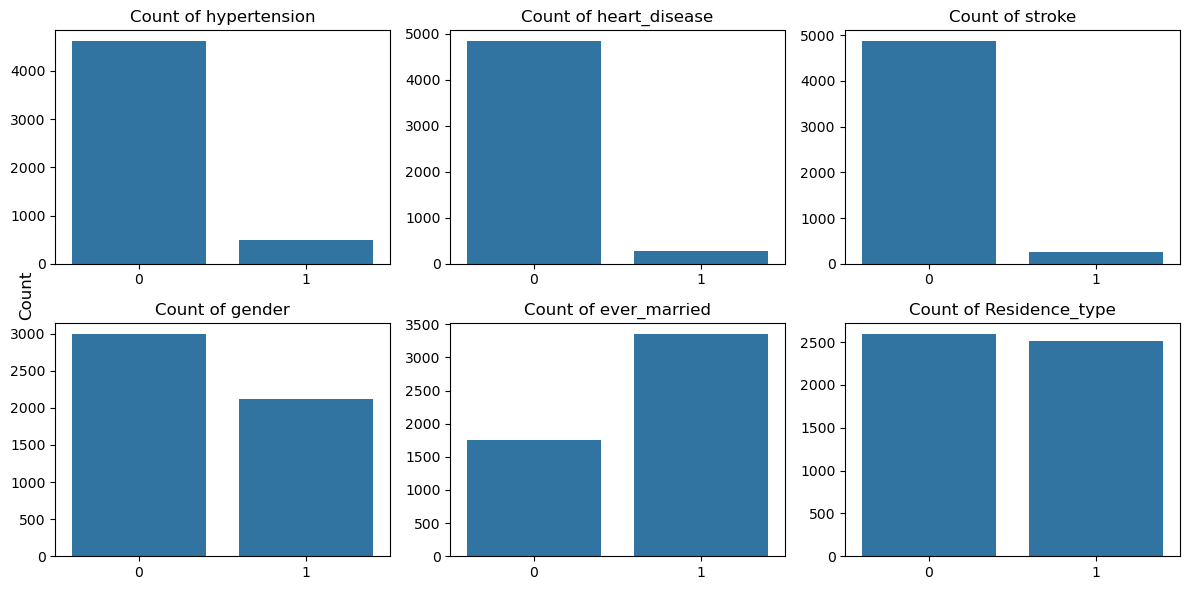

In [68]:
# Select categorical columns
category = df[['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'Residence_type']]
n_plots = len(category.columns)
n_cols = 3
n_rows = int(math.ceil(n_plots / n_cols))

# Set up grid layout
gs = gridspec.GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(12, 6))

# Plot each category using countplot
for i, col in enumerate(category.columns):
    ax = fig.add_subplot(gs[i])
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout()
fig.supylabel('Count')
plt.show()